In [81]:
import pandas as pd

df = pd.read_csv('../data/trajectories.csv')

trayectories_df = pd.DataFrame(df)

trajectories_date = trayectories_df['date'].unique()

In [90]:
import glob as glob
import netCDF4 as nc

files = glob.glob('../data/wind/2014/01/*.nc')
print(len(files))
wind_data = nc.Dataset(files[0])
time_value = wind_data.variables['time'].actual_range[0]
date_time = nc.num2date(time_value, wind_data.variables['time'].units).strftime('%Y-%m-%d')
date_time

31


'2014-01-14'

In [83]:
wind_data.variables.keys()

dict_keys(['time', 'altitude', 'latitude', 'longitude', 'wnd_ucmp_height_above_ground', 'wnd_vcmp_height_above_ground'])

In [84]:
import xarray as xr
import numpy as np

data = xr.open_dataset(files[0])
data.keys()


KeysView(<xarray.Dataset>
Dimensions:                       (time: 1, altitude: 1, latitude: 65,
                                   longitude: 107)
Coordinates:
  * time                          (time) datetime64[ns] 2014-01-14
  * altitude                      (altitude) float32 10.0
  * latitude                      (latitude) float32 23.0 23.5 ... 54.5 55.0
  * longitude                     (longitude) float32 -163.0 -162.5 ... -110.0
Data variables:
    wnd_ucmp_height_above_ground  (time, altitude, latitude, longitude) float32 ...
    wnd_vcmp_height_above_ground  (time, altitude, latitude, longitude) float32 ...
Attributes: (12/42)
    cdm_data_type:                        Grid
    Conventions:                          CF-1.6, COARDS, ACDD-1.3
    creator_email:                        CSO.navo.fct@navy.mil
    creator_name:                         FNMOC
    creator_type:                         institution
    creator_url:                          https://www.usno.navy.mil/FNMOC/

In [85]:
lat = data['latitude'].values
lon = data['longitude'].values
u_wind = data['wnd_ucmp_height_above_ground'].values
v_wind = data['wnd_vcmp_height_above_ground'].values

# Drop the height dimension
u_wind= np.squeeze(u_wind,axis=1)
v_wind= np.squeeze(v_wind,axis=1)

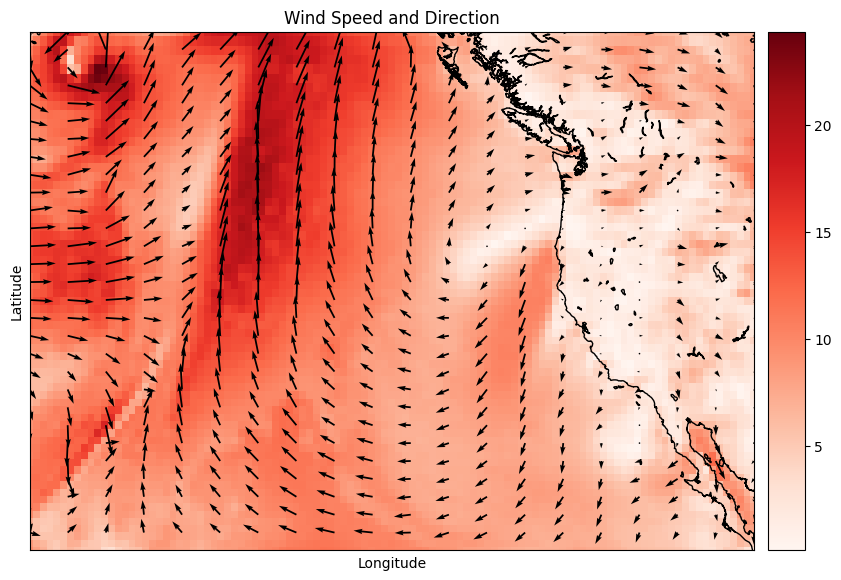

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

u1 = u_wind[0,:,:]
v1 = v_wind[0,:,:]
magnitude = np.sqrt(u1**2+v1**2)

fig, axes=plt.subplots(figsize=(10,10))
axes.set_title('Wind Speed and Direction')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_xlim([-78.5,-77.5])
axes.set_ylim([-12.5,-11.5])


m=Basemap(projection='mill',lat_ts=15,llcrnrlon=lon.min(), \
          urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
          resolution='i')

m.fillcontinents(color='0.6')
m.drawcoastlines()
x,y=m(*np.meshgrid(lon,lat))
#===============================
uproj,vproj,xx,yy=m.transform_vector(u1,v1,lon,lat,20,30,returnxy=True,masked=True)
#===============================
m.pcolormesh(x,y,magnitude,cmap=plt.cm.Reds)
m.quiver(xx,yy,uproj,vproj)
m.drawparallels(np.arange(-18,-2,1),labels=[1,0,0,0],linewidth=0.7,fontsize=9)
m.drawmeridians(np.arange(-86,-70,1),labels=[0,0,0,1],linewidth=0.7,fontsize=9)
m.colorbar()
plt.show()